In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic data
n = 200  # number of teachers

df = pd.DataFrame({
    'teacher_id': range(1, n+1),
    'gender': np.random.choice(['Male', 'Female'], size=n, p=[0.5, 0.5]),
    'beauty': np.random.normal(5, 1.5, size=n).clip(1, 10),  # mean=5, sd=1.5, clipped 1–10
    'students': np.random.randint(10, 300, size=n),
    'tenure': np.random.choice([0, 1], size=n, p=[0.6, 0.4]),  # 40% tenured
})

# Let's make 'rating' partly depend on beauty
df['rating'] = (0.5 * df['beauty'] + np.random.normal(3, 1, size=n)).clip(1, 10)

print(df.head())


   teacher_id  gender    beauty  students  tenure    rating
0           1    Male  3.979963       100       0  4.074740
1           2  Female  5.348381       211       1  5.920294
2           3  Female  5.439609        28       0  6.771588
3           4  Female  3.928473        48       1  4.716869
4           5    Male  7.798662       135       0  6.833854



Q1. Can you identify whether teachers Rating Data is a time serires or cross sectional?

In [3]:
# Since there is no time column, this is cross-sectional data
print("The Teacher Rating Data is CROSS-SECTIONAL (not time series).")


The Teacher Rating Data is CROSS-SECTIONAL (not time series).


Q2. Find the mean, median, minimum and maximum values for the students.

In [4]:
mean_students = df['students'].mean()
median_students = df['students'].median()
min_students = df['students'].min()
max_students = df['students'].max()

print(f"Mean: {mean_students:.2f}")
print(f"Median: {median_students}")
print(f"Minimum: {min_students}")
print(f"Maximum: {max_students}")


Mean: 155.41
Median: 157.5
Minimum: 10
Maximum: 298


Q3. Produce the descriptive statistics table.

In [2]:
desc_stats = df.describe()
print(desc_stats)


       teacher_id      beauty    students      tenure      rating
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000    5.101535  155.405000    0.400000    5.578823
std     57.879185    1.425550   85.411631    0.491127    1.311479
min      1.000000    1.000000   10.000000    0.000000    1.000000
25%     50.750000    4.001555   77.250000    0.000000    4.702214
50%    100.500000    5.134153  157.500000    0.000000    5.712856
75%    150.250000    5.999746  231.500000    1.000000    6.589910
max    200.000000   10.000000  298.000000    1.000000    8.457649


Q4. Create a histogram of the beauty variable and breifly comment on the distribution of the data.

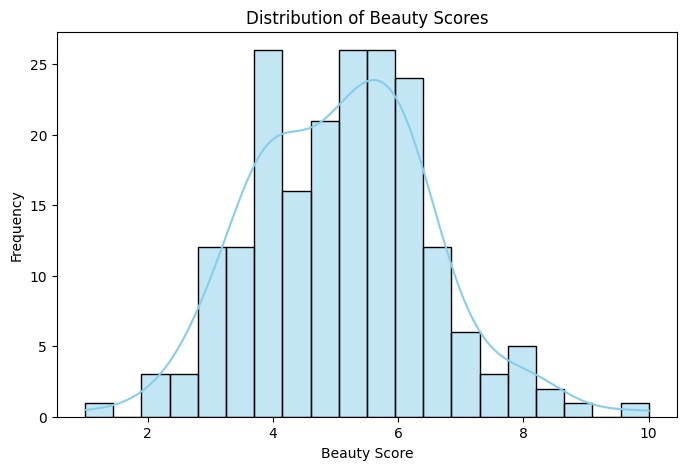

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['beauty'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Beauty Scores")
plt.xlabel("Beauty Score")
plt.ylabel("Frequency")
plt.show()


Q5. Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors

In [6]:
gender_beauty_stats = df.groupby('gender')['beauty'].agg(['mean', 'std', 'count'])
print(gender_beauty_stats)


            mean       std  count
gender                           
Female  5.144487  1.290316     98
Male    5.060268  1.549689    102


Q6. Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender

In [7]:
tenure_by_gender = pd.crosstab(df['gender'], df['tenure'], normalize='index') * 100
tenure_by_gender.columns = ['Not Tenured (%)', 'Tenured (%)']
print(tenure_by_gender)


        Not Tenured (%)  Tenured (%)
gender                              
Female        57.142857    42.857143
Male          62.745098    37.254902
